<a href="https://colab.research.google.com/github/ibad321/Plant-Disease-Prediction-Using-AlexNet-CNN/blob/main/Plant_Disease_Classification_using_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/kaggle.json'

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:28<00:00, 41.1MB/s]
100% 2.04G/2.04G [00:29<00:00, 75.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantvillage-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])


['segmented', 'grayscale', 'color']
38
['Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Peach___Bacterial_spot']
38
['Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Peach___Bacterial_spot']
38
['Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Peach___Bacterial_spot']


In [ ]:

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout

In [ ]:
# Dataset Path
base_dir = '/content/plantvillage dataset/color'

(256, 256, 3)


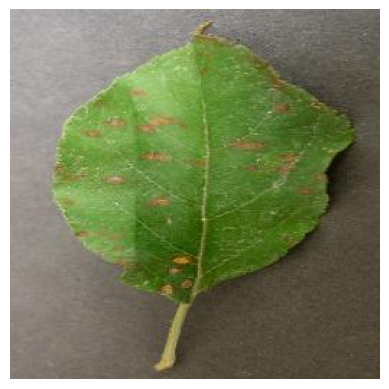

In [ ]:
#showing on images on dataset
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

# Create the validation generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = Sequential()

# Convolution Step 1
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='valid', input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(BatchNormalization())

# Convolution Step 2
model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(BatchNormalization())

# Convolution Step 3
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Convolution Step 4
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Convolution Step 5
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(BatchNormalization())

# Flattening Step
model.add(Flatten())

# Full Connection Step
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=38, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 26, 26, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 26, 26, 256)       0

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Epoch 1/10
1358/1358 [==============================] - ETA: 0s - loss: 2.1945 - accuracy: 0.4294

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1358/1358 [==============================] - 680s 492ms/step - loss: 2.1945 - accuracy: 0.4294 - val_loss: 1.5352 - val_accuracy: 0.5641 - lr: 1.0000e-04
Epoch 2/10
1358/1358 [==============================] - 666s 490ms/step - loss: 1.2153 - accuracy: 0.6420 - val_loss: 1.9232 - val_accuracy: 0.5176 - lr: 1.0000e-04
Epoch 3/10
1358/1358 [==============================] - 666s 490ms/step - loss: 0.8281 - accuracy: 0.7457 - val_loss: 1.9526 - val_accuracy: 0.5530 - lr: 1.0000e-04
Epoch 4/10
1358/1358 [==============================] - 679s 500ms/step - loss: 0.6118 - accuracy: 0.8071 - val_loss: 2.2025 - val_accuracy: 0.5626 - lr: 1.0000e-04
Epoch 5/10
1358/1358 [==============================] - 694s 511ms/step - loss: 0.4886 - accuracy: 0.8450 - val_loss: 0.8253 - val_accuracy: 0.7593 - lr: 1.0000e-04
Epoch 6/10
1358/1358 [==============================] - 672s 495ms/step - loss: 0.4018 - accuracy: 0.8727 - val_loss: 0.5186 - val_accuracy: 0.8449 - lr: 1.0000e-04
Epoch 7/10
1358/1358 

In [ ]:

model_save_path = '/content/drive/MyDrive/AlexNetModel.hdf5'
model.save(model_save_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<ipython-input-27-3ffca2d02e6d>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(source)


1/1 [==============================] - 0s 260ms/step


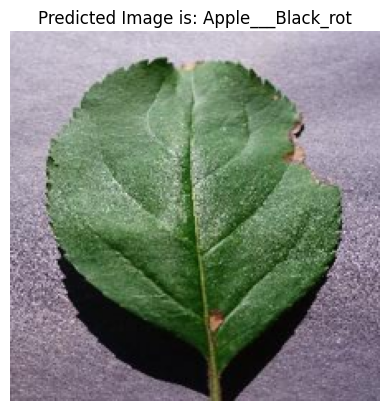

In [ ]:
import imageio
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Define the target class names
target_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
                'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
                'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
                'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
                'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
                'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
                'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
                'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot',
                'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
                'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
                'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

def run(source=None):
    # Load the model
    model = tf.keras.models.load_model('/content/drive/MyDrive/AlexNetModel.hdf5')

    # Load and preprocess the image
    img = imageio.imread(source)
    img = Image.fromarray(img).resize((224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    # Make a prediction
    prediction = model.predict(x)

    # Get the predicted class
    predicted_class = target_names[np.argmax(prediction)]

    # Display the image with the predicted class name
    plt.imshow(img)
    plt.title(f"Predicted Image is: {predicted_class}")
    plt.axis('off')  # Hide the axes
    plt.show()

# Run the function with the path to your image
run(source='/content/plant 2.jpeg')
